In [59]:
# Chapter 3 - Multiple Linear Regression (MLR)
# ---------------------------------------------
# Student: Ho Soo Hui

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# %matplotlib inline
# URL on matplotlib inline: https://stackoverflow.com/questions/43027980/purpose-of-matplotlib-inline

import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns

from scipy.stats import t
import numpy.linalg

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.model_selection import train_test_split

from scipy.stats import shapiro
from scipy.stats import anderson

In [2]:
# Step 1. Explore Data

# To import data set in from Excel file as a Pandas DataFrame object, 
#    type: df = pd.read_excel('Advertising.xlsx')
df3a = pd.read_excel('Data/MSS301_Advertising.xlsx')


In [3]:
# To know the dimensions of the data matrix
df3a.shape

(200, 4)

In [5]:
# To display the first 5 rows of data set
df3a.head()


,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
# To display the last 5 rows of data set
df3a.tail()

,TV,radio,newspaper,sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [10]:
# To display basic descriptive statistics of the data set
df3a.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [9]:
 # To check data types
df3a.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

In [11]:
# To generate correlation matrix
df3a.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [13]:
df3a.cov()

,TV,radio,newspaper,sales
TV,7370.949893,69.862492,105.919452,350.390195
radio,69.862492,220.427743,114.496979,44.635688
newspaper,105.919452,114.496979,474.308326,25.941392
sales,350.390195,44.635688,25.941392,27.221853


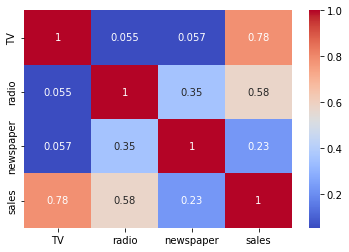

In [14]:
# To visualise correlation matrix in a heatmap, type: sns.heatmap(df.corr(), annot=True, cmap='coolwarm');
# Remark: colorbar can be further customised using cmap. Check out online resources for cmap.
sns.heatmap(df3a.corr(), annot=True, cmap='coolwarm');

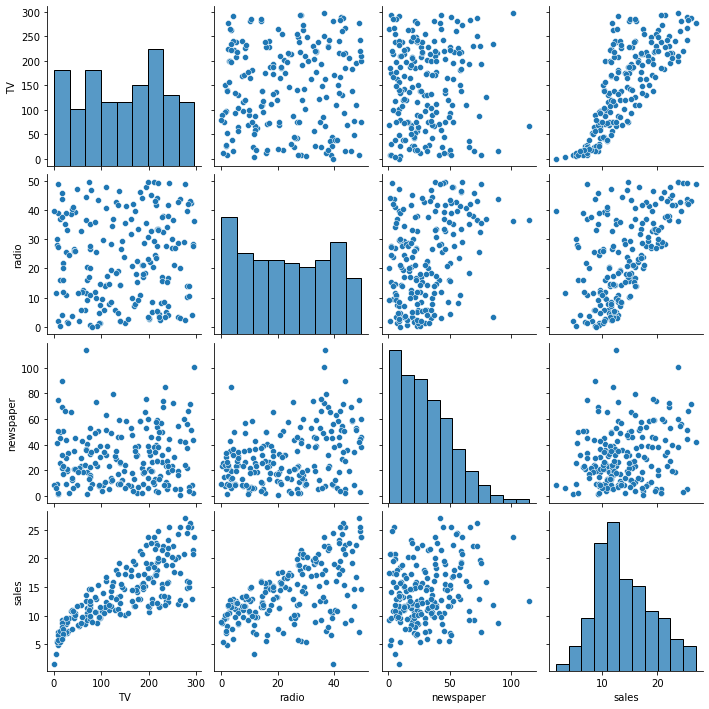

In [15]:
# To visualise pairwise relationship using Seaborn pairplot, type: sns.pairplot(df);
# Caution: It may take some time to generate a pairplot, especially when number of features is large.
sns.pairplot(df3a);

In [16]:
# Step 2. Fit Model
# Build a SLR model for sales using the predictor TV.

slrtv = ols("sales ~ TV", df3a).fit()
print(slrtv.summary())
print('\nMSE =', slrtv.mse_resid)


                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Fri, 08 Jul 2022   Prob (F-statistic):           1.47e-42
Time:                        14:51:20   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.0

In [17]:

# Build a SLR model for sales using the predictor radio.
slrradio = ols("sales ~ radio", df3a).fit()
print(slrradio.summary())
print('\nMSE =', slrradio.mse_resid)

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Fri, 08 Jul 2022   Prob (F-statistic):           4.35e-19
Time:                        14:52:41   Log-Likelihood:                -573.34
No. Observations:                 200   AIC:                             1151.
Df Residuals:                     198   BIC:                             1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3116      0.563     16.542      0.0

In [18]:
# Build a SLR model for sales using the predictor newspapers.
slrnews = ols("sales ~ newspaper", df3a).fit()
print(slrnews.summary())
print('\nMSE =', slrnews.mse_resid)

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     10.89
Date:                Fri, 08 Jul 2022   Prob (F-statistic):            0.00115
Time:                        14:53:41   Log-Likelihood:                -608.34
No. Observations:                 200   AIC:                             1221.
Df Residuals:                     198   BIC:                             1227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3514      0.621     19.876      0.0

In [22]:
# Build a full MLR model for sales using all the predictors.

mlrfull = ols("sales ~ TV + radio + newspaper", df3a).fit()
print(mlrfull.summary())
print('\nMSE =', mlrfull.mse_resid)

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 08 Jul 2022   Prob (F-statistic):           1.58e-96
Time:                        15:07:42   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

In [23]:
mlrfull.rsquared

0.8972106381789522

In [24]:
mlrfull.rsquared_adj

0.8956373316204668

In [25]:
mlrfull.f_pvalue

1.575227256092437e-96

In [26]:
mlrfull.pvalues

Intercept    1.267295e-17
TV           1.509960e-81
radio        1.505339e-54
newspaper    8.599151e-01
dtype: float64

In [ ]:
# Find beta_hat using the least square estimator formula.

beta_hat = np.linalg.inv(X.T@X)@X.T@y
beta_hat

In [27]:
# Verify that the coefficients from ols output agree with beta_hat.

mlrfull.params

Intercept    2.938889
TV           0.045765
radio        0.188530
newspaper   -0.001037
dtype: float64

In [28]:
# Step 4: Deploy Mode

# First create a dataframe for the new observation.  

x0 = pd.DataFrame(dict({'TV':[100],'radio':[10],'newspaper':[50]}))
x0

,TV,radio,newspaper
0,100,10,50


In [30]:
# For point prediction

mlrfull.predict(x0)


0    9.348779
dtype: float64

In [32]:
# For point and interval prediction
mlrfull.get_prediction(x0).summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,9.348779,0.231977,8.891288,9.806271,5.99338,12.704179


In [34]:
# Import Advertising data set in Excel format.
# Type your code here:  
# df3a = pd.read_excel('Data/MSS301_Advertising.xlsx')

# Fit a full MLR model on training data.
# Type your code here:
mlrfull = ols("sales ~ TV + radio + newspaper", df3a).fit()

In [35]:
res32 = mlrfull.resid

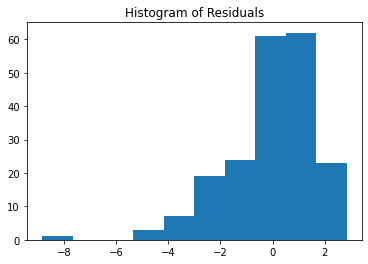

In [44]:
# Check whether residuals are normally distributed visually in a histogram.
plt.hist(res32)
plt.title('Histogram of Residuals');

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


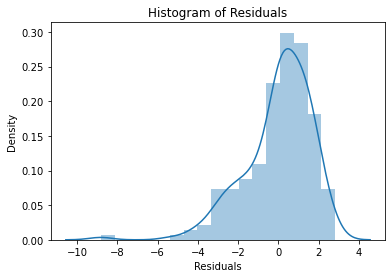

In [36]:
# Alternatively, use a distribution plot which is a histogram with a smooth curve fitted to it.
# Type: sns.distplot(residname);

sns.distplot(res32);  
plt.title('Histogram of Residuals')
plt.ylabel('Density')
plt.xlabel('Residuals');

C:\Users\user\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


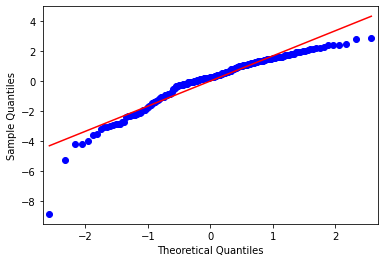

In [37]:
# Construct a QQ plot of residuals. Type: sm.qqplot(residname, line='s');

sm.qqplot(res32, line='s');

In [52]:
# To view a summary of the SLR model built, type: print(modelname.summary())
print(mlrfull.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 14 Jul 2022   Prob (F-statistic):           1.58e-96
Time:                        10:02:42   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

In [41]:
# To perform the Jarque-Bera test on residuals, type: sm.stats.jarque_bera(residname)
# The function returns: JB test statistic, p-value, estimated skewness, estimated kurtosis
sm.stats.jarque_bera(res32)

# result line 1 JB test statistics
# line 2 is p-value for JB test
# line 3 is estimated skewness
# line 4 is est kurtosis

# can get from summary as well


(151.2414204760394,
 1.4399347942384512e-33,
 -1.3273536543621278,
 6.3318912890625265)

In [42]:
# To perform the Omnibus test on residuals, type: sm.stats.omni_normtest(residname)
sm.stats.omni_normtest(res32)

# can get from summary as well

NormaltestResult(statistic=60.41395945525566, pvalue=7.608085583221206e-14)

In [46]:
# Conduct Shapiro-Wilk normality test. The function returns test statistics and P-value.

from scipy.stats import shapiro
shapiro(res32)

ShapiroResult(statistic=0.9176644086837769, pvalue=3.938041004403203e-09)

In [47]:
# Two ways to to conduct Anderson-Darling normality test
# One uses the scipy library, and one uses the statsmodel library
# scipy: returns test statistic and critical values. Reject H0 if test statistic > critical value
# statsmodel: returns test statistics and P-value

# Method 1
from scipy.stats import anderson
anderson(res32)

# Reject H0 if test statistics value > critical value
# because it is right-tailed test

# based on significance_level_array 5% location which is at
# location 3 which is 0.772
# this case is to reject H0

AndersonResult(statistic=3.7020094793051044, critical_values=array([0.565, 0.644, 0.772, 0.901, 1.071]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [48]:
# Method 2
sm.stats.normal_ad(res32)
# first value is computed test statistics value, second value is p-value

(3.7020094793051044, 2.8823454454317903e-09)

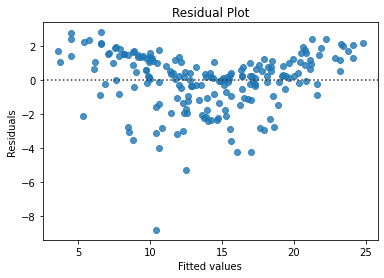

In [60]:
# Plot residuals vs fitted values to check for homoscedasticity.  
# Either, type: sns.residplot(modelname.fittedvalues, residname);
# Or, type: plt.plot(modelname.fittedvalues, residname, 'o');
sns.residplot(mlrfull.fittedvalues, res32)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title ('Residual Plot');

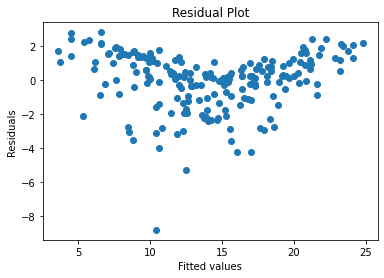

In [61]:
plt.plot(mlrfull.fittedvalues, res32, 'o')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title ('Residual Plot');

In [51]:
# Perform the Breusch-Pagan test on residuals. Type: sm.stats.het_breuschpagan(residname, modelname.model.exog)
# The function returns: Lagrange multiplier statistic, p-value, F-value, F p-value

sm.stats.het_breuschpagan(res32, mlrfull.model.exog)


(5.1328723532856335, 0.16232215845412137, 1.7209042102916001, 0.16399908905607)

In [62]:
# design matrix
mlrfull.model.exog

array([[  1. , 230.1,  37.8,  69.2],
       [  1. ,  44.5,  39.3,  45.1],
       [  1. ,  17.2,  45.9,  69.3],
       [  1. , 151.5,  41.3,  58.5],
       [  1. , 180.8,  10.8,  58.4],
       [  1. ,   8.7,  48.9,  75. ],
       [  1. ,  57.5,  32.8,  23.5],
       [  1. , 120.2,  19.6,  11.6],
       [  1. ,   8.6,   2.1,   1. ],
       [  1. , 199.8,   2.6,  21.2],
       [  1. ,  66.1,   5.8,  24.2],
       [  1. , 214.7,  24. ,   4. ],
       [  1. ,  23.8,  35.1,  65.9],
       [  1. ,  97.5,   7.6,   7.2],
       [  1. , 204.1,  32.9,  46. ],
       [  1. , 195.4,  47.7,  52.9],
       [  1. ,  67.8,  36.6, 114. ],
       [  1. , 281.4,  39.6,  55.8],
       [  1. ,  69.2,  20.5,  18.3],
       [  1. , 147.3,  23.9,  19.1],
       [  1. , 218.4,  27.7,  53.4],
       [  1. , 237.4,   5.1,  23.5],
       [  1. ,  13.2,  15.9,  49.6],
       [  1. , 228.3,  16.9,  26.2],
       [  1. ,  62.3,  12.6,  18.3],
       [  1. , 262.9,   3.5,  19.5],
       [  1. , 142.9,  29.3,  12.6],
 

In [63]:
# If you want to locate the index of the suspicious outlier residual: type residname.idxmin()  
# or, type: residname.idxmax() 

# If you want to the find the value of the suspicious outlier residual, type: residname[residname.idxmin()]

# If you want to find the data point of the suspicious outlier residual, type: df.loc[residname.idxmin(),:]

res32.idxmax()


117

In [64]:
res32.idxmin()

130

In [65]:
res32[res32.idxmin()]

-8.827687101769548

In [68]:
df3a.loc[res32.idxmin(),:]

TV            0.7
radio        39.6
newspaper     8.7
sales         1.6
Name: 130, dtype: float64

In [69]:
# Outlier test: p-value close to zero indicates outlier

#ot = mlr.outlier_test()
#print(ot.loc[ot["bonf(p)"]<0.05])

ot = mlrfull.outlier_test()
print(ot.loc[ot["bonf(p)"]<0.05])

# student_resid refers to 'studentized residual', which is computed by the formula:
#    studentized residual = residual / sqrt(MSE)
#    If absolute value of studentized residual > 3, this would suggest that this residual point is an outlier.
#    we look at the bonferroni p-value. If it is less than alpha, we reject H0.
#    H0: Data point is not an outlier
#    H1: Data point is an outlier


     student_resid       unadj_p   bonf(p)
130      -5.757983  3.267019e-08  0.000007


In [71]:
# Check Assumption: Independence
# Plot the errors (residuals) according to its observed order. 
# There should not be any autocorrelation. The errors should

#Try to also print the data values of the outlier observation 

print(df3a.loc[ot["bonf(p)"]<0.05])

      TV  radio  newspaper  sales
130  0.7   39.6        8.7    1.6


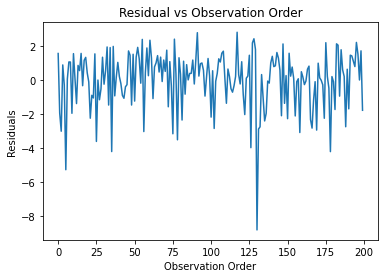

In [74]:
# Construct a line plot of residuals vs. observation order. Type: plt.plot(residname);
plt.plot(res32)
plt.xlabel('Observation Order')
plt.ylabel('Residuals')
plt.title ('Residual vs Observation Order');


In [73]:
# Perform the Durbin-Watson test on residuals. Type: sm.stats.durbin_watson(residname)
sm.stats.durbin_watson(res32)

# Output is 2 (rounded to nearest integer)
# Using Rule of thumb, 2 is no autocorrelation

2.0836484052944066

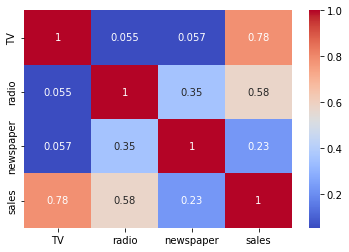

In [80]:
# Multicollinearity

# Construct a heatmap to check correlations between predictors.
sns.heatmap(df3a.corr(), annot=True, cmap='coolwarm');

# exclude response, the predictors are blue.. indicating no correlation

In [75]:
# To extract condition number, type: modelname.condition_number
# Note the condition number include the response variable.. thus, it is inaccurate

mlrfull.condition_number

454.37490123426056

In [79]:
# Remove the intercept and recompute the condition number for the correlation matrix only.

#xdata = df.iloc[:,0:3].values
# : - indicates all rows
# 0:3 - indicates column 0, 1, 2

#np.linalg.cond(xdata)

xdata = df3a.iloc[:,0:3].values
np.linalg.cond(xdata)

# The recomputed condition number (with only predictors) is now < 30, suggesting no 
# multicollinearity problem

12.623136926075038

In [86]:
# To compute VIF for each predictor, import function from library first:

#from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
#print(modelname.model.exog_names[1], vif(modelname.model.exog,1))

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
print(mlrfull.model.exog_names[1], vif(mlrfull.model.exog,1))
print(mlrfull.model.exog_names[2], vif(mlrfull.model.exog,2))
print(mlrfull.model.exog_names[3], vif(mlrfull.model.exog,3))

TV 1.0046107849396502
radio 1.1449519171055353
newspaper 1.1451873787239288


In [87]:
mlrfull.model.exog_names

['Intercept', 'TV', 'radio', 'newspaper']

In [104]:
for i in range(3):
    predictor = mlrfull.model.exog_names[i+1]
    Vif = vif(mlrfull.model.exog,i+1)
    print (predictor, Vif)

TV 1.0046107849396502
radio 1.1449519171055353
newspaper 1.1451873787239288


In [ ]:
# Split data set into 80:20.

#from sklearn.model_selection import train_test_split
#dftrain, dftest = train_test_split(df, test_size=0.2, random_state=12345)

# If you want to confirm ratio splitted:

#print( len(dftrain)/len(df) )
#print( len(dftest)/len(df) )


In [94]:
from sklearn.model_selection import train_test_split
dftrain, dftest = train_test_split(df3a, test_size=0.2, random_state=12345)

print( len(dftrain)/len(df3a) )
print( len(dftest)/len(df3a) )


0.8
0.2


In [97]:
# Alternatively:

#np.random.seed(12345)
#msk = np.random.rand(len(df)) < 0.8
#traindf = df[msk]
#testdf = df[~msk]
#print( len(traindf)/len(df) )
#print( len(testdf)/len(df) )

np.random.seed(12345)
msk = np.random.rand(len(df3a)) < 0.8
traindf = df3a[msk]
testdf = df3a[~msk]

print( len(traindf)/len(df3a) )
print( len(testdf)/len(df3a) )

0.785
0.215


In [98]:
mod1 = ols("sales ~ TV + radio + newspaper", dftrain).fit()
print(mod1.summary())
print('\nMSE =', mod1.mse_resid)

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     517.6
Date:                Thu, 14 Jul 2022   Prob (F-statistic):           7.81e-81
Time:                        11:48:02   Log-Likelihood:                -289.50
No. Observations:                 160   AIC:                             587.0
Df Residuals:                     156   BIC:                             599.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.4274      0.327     10.496      0.0

In [99]:
from sklearn import metrics

In [102]:
# Predict sales for testing data
#ypred1 = mod1.predict(dftest)

# Compute and print Rsq for testing data
#print('Rsq =', metrics.r2_score(dftest.sales, ypred1))

# Compute and print MSPE for testing data
#print('MSPE =', metrics.mean_squared_error(dftest.sales, ypred1))

ypred1 = mod1.predict(dftest)
print('Rsq =', metrics.r2_score(dftest.sales, ypred1))
print('MSPE =', metrics.mean_squared_error(dftest.sales, ypred1))

Rsq = 0.8610961612574065
MSPE = 5.431275526078179


In [107]:
# Fit models 2, 3 & 4.  
# Type your code here:

mod2 = ols("sales ~ TV + radio", dftrain).fit()
print(mod1.summary())
print('\nMSE =', mod1.mse_resid)

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     517.6
Date:                Thu, 14 Jul 2022   Prob (F-statistic):           7.81e-81
Time:                        19:58:07   Log-Likelihood:                -289.50
No. Observations:                 160   AIC:                             587.0
Df Residuals:                     156   BIC:                             599.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.4274      0.327     10.496      0.0

In [108]:
mod3 = ols("sales ~ TV + newspaper", dftrain).fit()
print(mod1.summary())
print('\nMSE =', mod1.mse_resid)

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     517.6
Date:                Thu, 14 Jul 2022   Prob (F-statistic):           7.81e-81
Time:                        19:58:54   Log-Likelihood:                -289.50
No. Observations:                 160   AIC:                             587.0
Df Residuals:                     156   BIC:                             599.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.4274      0.327     10.496      0.0

In [109]:
mod4 = ols("sales ~ radio + newspaper", dftrain).fit()
print(mod1.summary())
print('\nMSE =', mod1.mse_resid)

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     517.6
Date:                Thu, 14 Jul 2022   Prob (F-statistic):           7.81e-81
Time:                        19:59:23   Log-Likelihood:                -289.50
No. Observations:                 160   AIC:                             587.0
Df Residuals:                     156   BIC:                             599.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.4274      0.327     10.496      0.0

In [110]:
ypred2 = mod2.predict(dftest)
print('Rsq =', metrics.r2_score(dftest.sales, ypred2))
print('MSPE =', metrics.mean_squared_error(dftest.sales, ypred2))

Rsq = 0.8675366471986018
MSPE = 5.179446246303651


In [111]:
ypred3 = mod3.predict(dftest)
print('Rsq =', metrics.r2_score(dftest.sales, ypred3))
print('MSPE =', metrics.mean_squared_error(dftest.sales, ypred3))

Rsq = 0.6758393091759047
MSPE = 12.67499906789568


In [112]:
ypred4 = mod4.predict(dftest)
print('Rsq =', metrics.r2_score(dftest.sales, ypred4))
print('MSPE =', metrics.mean_squared_error(dftest.sales, ypred4))

Rsq = 0.26731832322949167
MSPE = 28.64856792636173


In [105]:
# Backward Selection Algorithm
# Instead of performing backward selection manually, the function coded below takes in the data and output the model at each step of the selection process.
# After running the cell with the coded function, call on the function by typing: backward_selection(dataframe, responsename)
# The default alpha is 5%, unless otherwise indicated.

def backward_selection(df, response, alpha=0.05):
    """
    df: Pandas DataFrame object
        Input the data in Pandas DataFrame format 
    response: string
        Input the response variable
    alpha: float
        Input the significance level alpha for t-test
        Default value = 0.05
    """
    # Extract all predictors from the data frame by dropping the response variable
    predictors = df.columns.drop(response) 
    # Extract the response variable
    y = df[response]
    # Create empty list to store values 
    model, r2, mse, Pmax = [], [], [], []
    # Create a while loop to continue performing backward selection as long as the number of predictors is at least one
    while len(predictors)>0:
        # Create the matrix X with a column of ones
        X = df[predictors]
        Xc = sm.add_constant(X)
        # Fit the MLR model
        mlr = sm.OLS(y,Xc).fit()
        # Get the list of all parameters (including constant)
        model.append(mlr.model.exog_names)
        # Get the maximum p-values and append it to the list Pmax
        pmax = mlr.pvalues.iloc[1:].max()
        Pmax.append(round(pmax,4))
        # Get the adjusted R2 value and append it to the list r2
        r2.append(round(mlr.rsquared_adj,4))
        # Get the MSE value and append it to the list mse
        mse.append(round(mlr.mse_resid,4))
        if pmax < alpha:
            # If the maximum p-values is less than alpha, then break the while loop and we get the optimal model
            break
        else:
            # Otherwise, get the predictor whose p-values is max
            var = mlr.pvalues.iloc[1:].idxmax()
            # Update the list of predictors by dropping the one that is not significant, then repeat the while loop
            predictors = X.columns.drop(var)
        # Create a dictionary consisting of the model, max p-values and adj R2, at each step of backward selection
        d = dict({'Model':model,'MSE':mse,'adj-R2':r2,'Pval_max':Pmax})
    return pd.DataFrame(d, columns=['Model','adj-R2','MSE','Pval_max']) # Return the dictionary as data frame object

In [106]:
# Apply the backward_selection function on the Advertising data set.
#backward_selection(df, 'sales')
backward_selection(df3a, 'sales')

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,Model,adj-R2,MSE,Pval_max
0,"[const, TV, radio, newspaper]",0.8956,2.8409,0.8599
1,"[const, TV, radio]",0.8962,2.8270,0.0000
